> **DO NOT EDIT IF INSIDE `caobd_s19` folder** 

# Assignment 2

**Handin in Peergrade**: *Wednesday*, March 13, 2019, 23:59<br>
**Peergrading deadline**: *Wednesday*, March 20, 2019, 23:59<br>
**Peergrading feedback deadline**: *Sunday*, March 23, 2019, 23:59

[**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 4

> **Ex. 4.3.2**: Implement cross validation. The performance of a classifier is strongly dependent on the amount of data it is trained on. In Ex. 4.3.1 you train it on only half of the data and test it on the other half. If you rerun that code multiple times, with random 50/50 partitions, you are gonna see a lot of uncertainty in performance. Cross validation solves this problem by training on a larger subset of the data and testing on a smaller one, and taking the average performance over K-folds of this process.
1. Implement cross validation over $K=10$ folds. For each fold you must record the training and test accuracies. In the end, visualize the distributions of test- and training accuracy as histograms in the same plot. It's important that you comment on the result.

In [49]:
# Given code from Ulf

import re, os

def get_alliances(char, faction=None):
    
    """Return list of alliances for Marvel character."""
    
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir('/Users/ooganam/Desktop/bigdata/caobd_s19/data/%s' % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("/Users/ooganam/Desktop/bigdata/caobd_s19/data/%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()

    # Get alliance field
    alliances_field = re.findall(r"alliances[\w\W]+?\|.+=", markup)
    if alliances_field == []:
        return []

    # Extract teams from alliance field
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", alliances_field[0][10:])]
get_alliances("Iron Man")

['Avengers (comics)',
 'United States Department of Defense',
 'Force Works',
 'The New Avengers (comics)',
 'Guardians of the Galaxy (2008 team)',
 'Illuminati (comics)',
 'The Mighty Avengers',
 'S.H.I.E.L.D.',
 'Stark Industries',
 'Stark Resilient',
 'Thunderbolts (comics)']

In [26]:
# Setup for 4.3.2

list = []
target = []

counter = 0
nonamb = 0

#adds number of alliances for a given character
def sum(vector):
    counter = 0
    for i in vector:
        counter += 1
    return counter


for faction in ["heroes", "ambiguous", "villains"]:
    for filename in os.listdir('/Users/ooganam/Desktop/bigdata/caobd_s19/data/%s' % faction):
        charname = filename[0:-4]
        alliances = get_alliances(charname)
        #if a character has more than 0 alliances, then add his name and faction to a list
        if (sum(alliances) > 0):
            target.append((charname, faction))
        #add alliances all alliances to a list and sort it
        for i in alliances:
            list.append(i)    
sortedlist = sorted(set(list))

import numpy as np

# makes one row in the alliance matrix, all 0s, fill in ones for the alliances a character belongs to
def alliancesvector(heroname):
    
    teams = get_alliances(heroname)
    vector = np.zeros(len(sortedlist))
    
    for i in range(len(sortedlist)):
        
        if sortedlist[i] in teams:
         
            vector[i] = 1
    return vector

print(sum(alliancesvector("Iron Man")))



622


In [27]:
# creating the alliance matrix

alliancematrix = []
counter = 0        

# this loop makes the alliance matrix
for i, j in target:
    alliances = alliancesvector(i)
    guard = sum(alliances) 
    if (guard > 0):
        if (j != "ambiguous"):
            alliancematrix.append(alliances)
alliancematrix = np.array(alliancematrix)



In [28]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

model = BernoulliNB()
removeambigs = [i for _,i in target if i != 'ambiguous']
y_true = np.array([1 if j == 'heroes' else 0 for j in removeambigs])

model.fit(alliancematrix, y_true)  # <--- This is the training/fitting/learning step
y_preds = model.predict(alliancematrix)
print(accuracy_score(y_true, y_preds))
print(len(alliancematrix))


print('precision', 'recall', 'fscore')
for i in precision_recall_fscore_support(y_true, y_preds, average = None, labels = [1,0])[0:-1]:
    print(i[0])


0.9288321167883211
1096
precision recall fscore
0.963855421686747
0.8888888888888888
0.9248554913294798


train accuracy
0.9127789046653144
0.9087221095334685
0.9056795131845842
0.907707910750507
0.9178498985801217
0.9290060851926978
0.9371196754563894
0.9381338742393509
0.9391480730223124
0.9353535353535354
test accuracy
0.7545454545454545
0.7
0.7363636363636363
0.7454545454545455
0.8181818181818182
0.9545454545454546
0.9090909090909091
0.8909090909090909
0.9363636363636364
0.8679245283018868


Text(0.5, 0, 'accuracy')

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


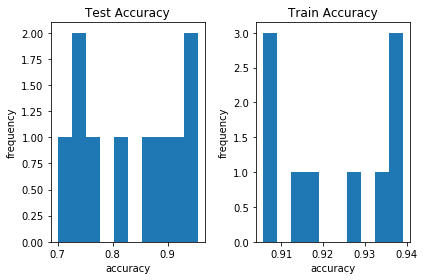

In [29]:
#9 folds of 110, 1 fold of 106
import matplotlib.pyplot as plt

def partition(matrix, k):
    if k!=10:
        toberemoved = matrix[110*k:110*(k+1)]
        matrix = np.delete(matrix, slice(110*k, 110*(k+1)),axis = 0)
    else:
        toberemoved = matrix[110*k:len(matrix)]
        matrix = np.delete(matrix, slice(110*k, len(matrix)),axis = 0)
    return matrix, toberemoved
        
        
trainaccuracy = []
testaccuracy = []
for k in range (0,10):
    xtrain, xtest = partition(alliancematrix, k)
    ytrain, ytest = partition(y_true, k)
    model.fit(xtrain, ytrain)  # <--- This is the training/fitting/learning step
    y_preds = model.predict(xtest)
    y_trpreds = model.predict(xtrain)
    trainaccuracy.append(accuracy_score(ytrain, y_trpreds))
    testaccuracy.append(accuracy_score(ytest, y_preds))
print("train accuracy")
for i in trainaccuracy:
    print(i)
print("test accuracy")
for j in testaccuracy:
    print(j)

fig, axs = plt.subplots(1, 2, tight_layout=True)
axs[0].set_title("Test Accuracy")
axs[0].hist(testaccuracy)
axs[0].set_ylabel("frequency")
axs[0].set_xlabel("accuracy")
axs[1].set_title("Train Accuracy")
axs[1].hist(trainaccuracy)
axs[1].set_ylabel("frequency")
axs[1].set_xlabel("accuracy")

#4.3.2.1 Comment on results

The training accuracy is very high and is low to mid 90%.
This is to be expected because the model is optimized on the training set,
so if you validate the model with the training set you will obtain optimal results as well.

The test accuracy on the other hand had more variation, ranging from 0.7 to 0.95.
It's interesting that the accuracies were low to begin with and then gradually increased.
Perhaps the model performance improved as it corrected upon earlier deficiencies as it
progressed through the 10 folds. 

>**Ex. 4.4.1**: Let's put our classifier to use!
* Retrain your model on all of your data.
* Create a team alliance representation of the ambiguous characters
* Use the model the estimate the probability that each character is a villain (let's call this *villainness*). You can use the `.predict_proba` method on the model to get probability estimates rather than class assignments.
* **Visualize the "heroness" distribution for all ambiguous characters**. Comment on the result.

Abner Jenkins
Air-Walker
Alex Wilder
Angel Salvadore
Ares (Marvel Comics)
Ben Reilly
Bengal (comics)
Blue Streak (comics)
Caliban (Marvel Comics)
Callisto (comics)
Captain America (William Burnside)
Cardiac (comics)
Cardinal (comics)
Charcoal (comics)
Constrictor (comics)
Copycat (Marvel Comics)
Crippler (comics)
Daimon Hellstrom
David North (comics)
Delphyne Gorgon
Detroit Steel
Diamond Lil (comics)
Diamondback (Rachel Leighton)
Doctor Druid
Doctor Nemesis
Doctor Spectrum
Eddie Brock
Emma Frost
Empath (comics)
Erik Josten
Feral (comics)
Fin Fang Foom
Francis Fanny
Gargoyle (comics)
Ghost (Marvel Comics)
Gladiatrix (comics)
Golem (comics)
Googam
Gorgon (Inhuman)
Gorilla-Man
Gremlin (comics)
Guardsman (comics)
Hannibal King
Harry Osborn
Headhunter (comics)
Hellfire (J. T. Slade)
Holocaust (Marvel Comics)
Hope Pym
Human Fly (comics)
Humbug (comics)
Jamie Madrox
Janice Lincoln
Joanna Cargill
Joseph (comics)
Joystick (comics)
Juggernaut (comics)
Kaine Parker
Karla Sofen
Kestrel (Marvel Com

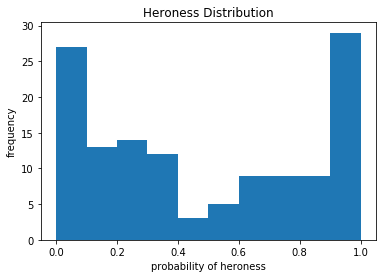

In [30]:
# ANSWER 4.4.1


# team alliance representation of the ambiguous characters
ambigalliance = []
for i, j in target:
 
    alliances = alliancesvector(i)
    guard = sum(alliances) 
    
    if (guard > 0):
        if (j == "ambiguous"):
            print(i)
            ambigalliance.append(alliances)
ambigalliance = np.array(ambigalliance)

# estimating the probability that each character is a villain
y_villambig = [model.predict_proba(ambigalliance)[i][0] for i in range(len(ambigalliance))]

y_heroambig = [model.predict_proba(ambigalliance)[i][1] for i in range(len(ambigalliance))]



# Visualizing the heroness distrubition of ambiguous characters
plt.hist(y_heroambig)
plt.title("Heroness Distribution")
plt.xlabel("probability of heroness")
plt.ylabel("frequency")
plt.show()


Comments:
The distribution is U-shaped indicating most ambiguous characters are likely, with a high degree of certainty, to
be either a hero or a villain. Not many characters are in the middle, where they could swing either in the direction of hero or villain. 

### Week 5

>**Ex. 5.1.3**: Print the maximum entropy path of a decision tree.
>
>1. Implement the following pseudocode and print the output:<br><br>
>Step 1. Find `team` that gives lowest split entropy for `data`. Print `team`.<br>
>Step 2. Split `data` on `team`, to produce `data0` and `data1`. Print the entropy of each, as well as their weighted avg. entropy.<br>
>Step 3. Overwrite the `data` variable with either `data0` or `data1`, depending on which has the highest entropy.<br>
>Step 4. Stop if there are less than 5 datapoints in `data`. Otherwise start over from 1.<br><br>
>My output looks [like this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_6.2.3.1.png) for the first five splits.<br><br>
>
>2. Comment on decision path your code takes: How splits are there? Do you notice anything interesting about the final splits? Why do we choose to stop splitting before `data` get smaller than 5?
>3. Train a `sklearn.tree.DecisionTreeClassifier` classifier on the dataset. Initiate the classifier with `criterion='entropy'`. What are the most important features of this classifier? How does this line up with the order of the order of splits you just printed (a comment is fine)?

In [31]:
########### CODE NEEDED FROM EARLIER QUESTIONS TO MAKE 5.1.3 RUN CORRECTLY ###############
all_teams = []
all_chars = []
for faction in ["heroes", "ambiguous", "villains"]:
    path = '/Users/ooganam/Desktop/bigdata/caobd_s19/data/%s' % faction
    for filename in os.listdir(path):
        char = filename[:-4]
        all_chars.append(char)
        alliances = get_alliances(char, faction=None)
        for team in alliances:
            if team not in all_teams:
                all_teams.append(team) 
all_teams.sort()

def vectorRep(name):
    teams = get_alliances(name)
    vector = np.zeros(len(all_teams))
    i = 0
    for team in all_teams:
        if team in teams:
            vector[i] = 1
        i = i + 1
    return vector
teamAlliance = []
target = []

for faction in ["heroes", "villains"]:
    path = '/Users/ooganam/Desktop/bigdata/caobd_s19/data/%s' % faction
    for filename in os.listdir(path):
        char = filename[:-4]
        vector = vectorRep(char)
        sum = 0
        for i in vector:
            if i == 1:
                sum = sum + 1
        if sum != 0:
            teamAlliance.append(vector)
            if faction == "heroes":
                target.append(1)
            elif faction == "villains":
                target.append(0)

In [14]:
########### CODE NEEDED FROM EARLIER QUESTIONS TO MAKE 5.1.3 RUN CORRECTLY ###############
from scipy import stats
import math

#Function to calculte shannon entropy, given a probability vector
def sEntropy(prob_vect):
    sum = 0
    for i in prob_vect:
        if i != 0:
            sum = sum + (i * math.log2(i))
    sum = sum * (-1)
    return sum

In [15]:
########### CODE NEEDED FROM EARLIER QUESTIONS TO MAKE 5.1.3 RUN CORRECTLY ###############

#Function to create probability vector of a given subset
def calcProb(subset):
    numHeroes = 0
    numVillains = 0
    for i in subset:
        if i == 0:
            numVillains += 1
        if i == 1:
            numHeroes += 1
    if len(subset) == 0:
        return [0]
    probHeroes = numHeroes / len(subset)
    probVillains = numVillains / len(subset)
    vector = [probHeroes, probVillains]
    return vector

In [17]:
########### CODE NEEDED FROM EARLIER QUESTIONS TO MAKE 5.1.3 RUN CORRECTLY ###############

#Given a data array and a team to split on, calculate average entropy of split
def averageEnt(data, team):
    inTeam = []
    notTeam = []

    index = all_teams.index(team)

    for char in range(len(data)):
        if data[char][index] == 1:
            inTeam.append(target[char])
        else:
            notTeam.append(target[char])
            
    inTeamProb = calcProb(inTeam)
    notTeamProb = calcProb(notTeam)
    
    inEnt = sEntropy(inTeamProb)
    notInEnt = sEntropy(notTeamProb)
    
    wAverage = (len(inTeam)/len(teamAlliance)* inEnt) + (len(notTeam)/len(teamAlliance)* notInEnt)
    return wAverage

In [18]:
data = teamAlliance.copy()
length = 0

while length < 8:
    print("\nSPLIT", length, ":",)

    currEnt = 1
    currTeam = ""
    
    #Find team with lowest entropy
    for team in all_teams:
        ent = averageEnt(data, team)
        if ent < currEnt:
            currEnt = ent
            currTeam = team
    print("Team with lowest Entropy:", currTeam)

    #STEP 2
    
    #Arrays that store the info from data after it has been split
    data0 = []
    data1 = []
    
    #Arrays that store whether a character is a villain or a hero after the split
    inTeam = []
    notTeam = []
    
    index = all_teams.index(currTeam)

    #Add whether character is a hero or villain to array
    for char in range(len(data)):
        if data[char][index] == 1:
            inTeam.append(target[char])
            
        else:
            notTeam.append(target[char])
    
    #Add character row to new array based on whether they are in the team or not
    for char in data:
        if char[index] == 1:
            data1.append(char)
        else:
            data0.append(char)
       
    #Calculate Shannon Entropy of both data0 and data1
    inTeamProb = calcProb(inTeam)
    notTeamProb = calcProb(notTeam)
    inEnt = sEntropy(inTeamProb)
    notInEnt = sEntropy(notTeamProb)  
    print("Entropy for characters in the team =", inEnt)
    print("Entropy for characters NOT in the team =", notInEnt)

    wAverage = (len(data1)/len(data)* inEnt) + (len(data0)/len(data)* notInEnt)

    print("Size of data0:", len(inTeam))
    print("Size of data1:", len(notTeam))

    #STEP 3
    #Override team alliance with whichever array has highest entropy
    if inEnt > notInEnt:
        data = data1.copy()
    else:
        data = data0.copy()

    length += 1


SPLIT 0 :
Team with lowest Entropy: Avengers (comics)
Entropy for characters in the team = 0.3045866885214023
Entropy for characters NOT in the team = 0.9931163149431501
Size of data0: 92
Size of data1: 1004

SPLIT 1 :
Team with lowest Entropy: X-Men
Entropy for characters in the team = 0.39124356362925566
Entropy for characters NOT in the team = 0.9999158738504808
Size of data0: 78
Size of data1: 926

SPLIT 2 :
Team with lowest Entropy: Sinister Six
Entropy for characters in the team = 0.6840384356390417
Entropy for characters NOT in the team = 0.9721174853187264
Size of data0: 33
Size of data1: 893

SPLIT 3 :
Team with lowest Entropy: New Warriors
Entropy for characters in the team = -0.0
Entropy for characters NOT in the team = 0.9747253751506133
Size of data0: 25
Size of data1: 868

SPLIT 4 :
Team with lowest Entropy: X-Mansion
Entropy for characters in the team = -0.0
Entropy for characters NOT in the team = 0.962090810173051
Size of data0: 18
Size of data1: 850

SPLIT 5 :
Team w

5.1.3.2 Comments



There are 7 splits, and after the 7th there are no longer any more splits because 
there are only heroes in both groups. The fifth split was interesting because
usually the data split on the larger group, but for this particular split it split on the smaller 
group (A-Force). We choose to stop splitting data before the data got smaller than 5 because 
there are so few characters that it's likely that more than one team would have the lowest
split entropy (especially if all the target values are 1's or 0's).

The entropy criterion has the feature that at every split, the decision tree seeks to maximize information gain/
minimize entropy. In other words, the two groups resulting from the split should have target values
that are as homogenous as possible. In step 1 of the pseudocode, we also made the split depending on
which team had the lowest split entropy.

In [19]:
# 5.1.3.3

from sklearn.tree import DecisionTreeClassifier as dt

model = dt(criterion = 'entropy')
model.fit(alliancematrix, y_true)  # <--- This is the training/fitting/learning step
y_preds = model.predict(alliancematrix)
print(y_preds)

# 

[1 1 1 ... 0 0 0]



The entropy criterion has the feature that at every split, the decision tree seeks to maximize information gain/
minimize entropy. In other words, the two groups resulting from the split should have target values
that are as homogenous as possible. In step 1 of the pseudocode, we also made the split depending on
which team had the lowest split entropy.

### Week 6

> **Ex. 6.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

[1, 2, 3, 4]
[(1, 2)]


/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


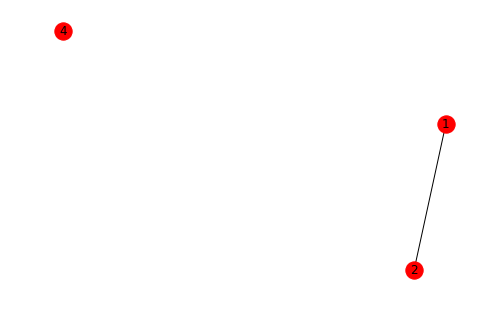

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import netwulf

G = nx.Graph()

# 6.1.1.1
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_edge(1,2)

# 6.1.1.2
print (G.nodes)
print (G.edges)

# 6.1.1.3
G.remove_node(3)

# 6.1.1.4
nx.draw(G, with_labels=True)


> **Ex. 6.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-2.2/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

**ANSWER 6.1.3.1**

The Barabási–Albert (BA) model is an algorithm for generating random scale-free networks using a preferential attachment mechanism. So there are some nodes that have a much higher than others. Examples include the internet and some social networks.

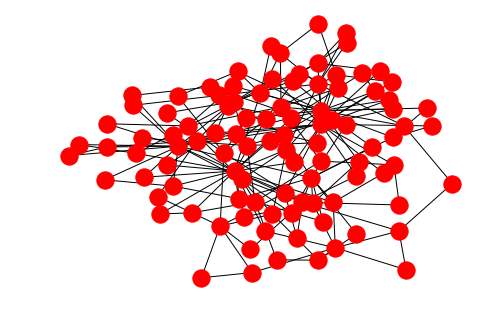

In [33]:
#6.1.3.2 and 6.1.3.3

BA = nx.barabasi_albert_graph(100, 2, seed=None)

nx.draw(BA)

Text(0.5, 1.0, 'Degree Distribution of BA graph')

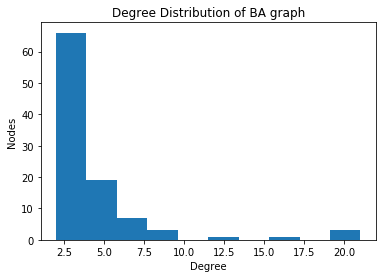

In [34]:
#6.1.3.4
elements = nx.degree(BA)

data = [x[1] for x in elements]



plt.hist(data)
plt.xlabel("Degree")
plt.ylabel("Nodes")
plt.title("Degree Distribution of BA graph")

**ANSWER 6.1.3.5**

The main difference when comparing to an ER graph is that for the BA, there are relatively few nodes that have a very high degree, which follows the power law. Versus for the ER graphs, it does not follow the power law so there is not a consistent pattern to how many degrees nodes have.

**ANSWER 6.1.3.6**

Another measure we could have used would be to look at the average number of edges for a node. Or measure the entropy of the graph.

> **Ex: 6.2.2**: Create a `networkx.Graph` that represents each partnership between characters, as an edge. Print the number of nodes, edges and average degree of the resulting network.

In [36]:
# Setup for 6.2.2

import re, os

def get_partners(char, faction=None):
    """Return list of alliances for Marvel character."""
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir('/Users/ooganam/Desktop/bigdata/caobd_s19/data/%s' % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("/Users/ooganam/Desktop/bigdata/caobd_s19/data/%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()
        
    # Get partners field
    partners_field = re.findall(r"\| *partners[\w\W]+?\|.+=", markup)
    if partners_field == []:
        return []
 
    # Extract links from partners field
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", partners_field[0])]

get_partners('Iron Man')

['War Machine', 'Pepper Potts', 'Riri Williams']

In [48]:
# dictionary with chars as key and class as value 
chardict = {}

# full list of characters which is used to index chardict
chars = []

for faction in ["heroes", "villains", "ambiguous"]:
    for filename in os.listdir('/Users/ooganam/Desktop/bigdata/caobd_s19/data/%s' % faction):
        name = filename[:-4]
        it_teams = get_alliances(name);
        
        # make the regular list of characters
        if (name not in chars):
            chars.append(name)
            
        # make the dictionary and assign a number based on their class
        # make heroes 1
        if (faction == "heroes"):
            chardict[name] = 1
        # make villains -1 
        if (faction == "villains"):
            chardict[name] = -1
        # make ambiguous 0
        if (faction == "ambiguous"):
            chardict[name] = 0
        
#alphabetize the characters        
chars.sort()


KeyboardInterrupt: 

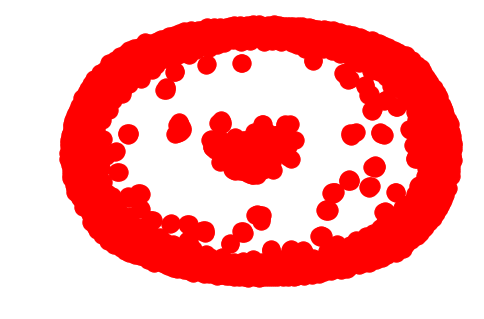

In [44]:
marv = nx.Graph()

# adds node for character, and then creates list of character and partner pairs to be appended as edges
for char in chars:
    
    marv.add_node(char)
    templist = []
    partners = []
    partners = get_partners(char)
    for part in partners:
        var = []
        var.append(char)
        var.append(part)
        templist.append(var)
        
    marv.add_edges_from(templist)

nx.draw(marv)

In [52]:
nodedegs = nx.average_neighbor_degree(marv)
nodenum = nx.number_of_nodes(marv)
edgenum = nx.number_of_edges(marv)


avgdeg = 0

for k,v in nodedegs.items():
    avgdeg += v
    
avgdeg /= len(nodedegs)

print("Average Degree of Network: %f" % avgdeg)  
print("Number of Nodes: %d" % nodenum)
print("Number of Edges: %d" % edgenum)



Average Degree of Network: 0.936745
Number of nodes: 1979
Number of edges: 464


> **Ex: 6.2.3**: Plot the degree distribution of your character network. What type of random network does it resemble?

Text(0.5, 1.0, 'Degree Distribution of Marvel graph')

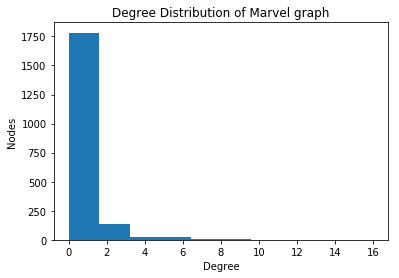

In [45]:
# 6.2.3.

elements = nx.degree(marv)

data = [x[1] for x in elements]

plt.hist(data)
plt.xlabel("Degree")
plt.ylabel("Nodes")
plt.title("Degree Distribution of Marvel graph")


The plot resembles the Barabasi Albert network in that it generally follows the idea that there are few nodes (characters) who have a high degree (number of partnerships).

> **Ex: 6.2.7**: Let's make a nice plot of the network.
* Color the nodes by class. Try if you can to use blue for heroes, red for villains and yellow(ish) for ambiguous.
* Scale the size of nodes by the square root of their degree.
* Adjust the layout of the figure so it doesn't look too messy (e.g. edge line width, node line width, type of force-layout [I can recommend *neato*, but you have to install graphviz with conda to use it])
* Do you see anything interesting? Get any new ideas for things that can be investigated?

> ***PROTIP THOUGH***: *If you want to make a beautiful plot, I actually made [a tool](https://ulfaslak.com/works/network_styling_with_d3/index.html) for making pretty visualizations of networks. I'd be curious to see the Marvel network visualized in my tool. You can also launch networks into it directly from Python using the `netwulf` package (you can install it with pip). Just follow [this example](https://github.com/benmaier/netwulf). You can download the image and include it in the notebook as a link (which you have to host somewhere).*

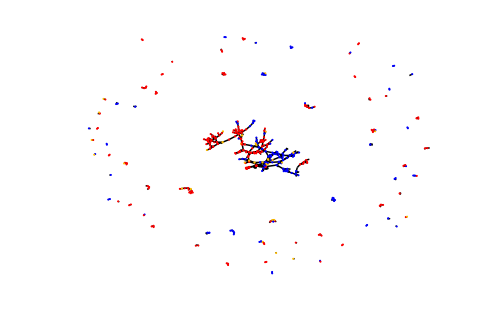

In [46]:
import math

# 6.2.7 FIRST VERSION 

# this version ignores the characters without connections by setting their node_size to 0 through that parameter.
# below we have included another version that takes into account the characters with no connections.

# setup for assigning nodes their specified colors -- villains are red, heroes are blue, ambiguous yellowish
cmap_custom = plt.cm.Wistia
cmap_custom.set_under('r')
cmap_custom.set_over('b')

values = [chardict.get(node) for node in marv.nodes()]

degs = nx.degree(marv)

nx.draw(marv, cmap = cmap_custom, node_color = values, width = 1.5, vmin = -0.01, vmax = 0.01, node_size = [(math.sqrt(v)) for k,v in degs])
plt.show()

**Comment on interesting things/potential investigations**

It is definitely interesting (and a good sanity check) that the graphs maintain their general shape between our two plots. 

Additionally, it looks like there is a large clump in the middle which houses the characters they have a higher number of connections. 

In terms of what we could explore further, we could check which teams collectively have the most/least alliances, as well as the pairs of teams that have the greatest degree of connectivity. 
 

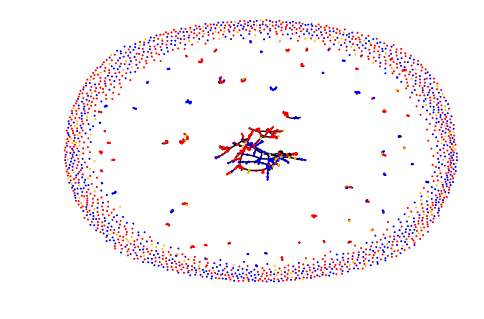

In [66]:
# 6.2.7 SECOND VERSION

# We weren't sure whether to include those without connections or not, 
# so this version includes them in the plot by adding 1 to the squareroot of their node size

nx.draw(marv, cmap = cmap_custom, node_color = values, width = 1.5, vmin = -0.01, vmax = .01, node_size = [(math.sqrt(v) + 1) for k,v in degs])

In [54]:
from netwulf import visualize

visualize(marv)

changing directory to /Users/ooganam/.netwulf
starting server here ... /Users/ooganam/.netwulf


127.0.0.1 - - [14/Mar/2019 10:43:51] "GET /?data=tmp_1697b9620a7.json&config=config_tmp_1697b9620a7.json HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2019 10:43:51] "GET /style.css HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2019 10:43:51] "GET /libs/d3.v4.min.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2019 10:43:51] "GET /libs/dat.gui.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2019 10:43:51] "GET /libs/sweetalert.min.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2019 10:43:51] "GET /libs/lodash.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2019 10:43:51] "GET /vis.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2019 10:43:51] "GET /parse_options.js HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2019 10:43:51] "GET /config_tmp_1697b9620a7.json HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2019 10:43:51] "GET /tmp_1697b9620a7.json HTTP/1.1" 200 -


stopping server ...
was asked to stop the server
deleted all files
changing directory back to /Users/ooganam/Desktop


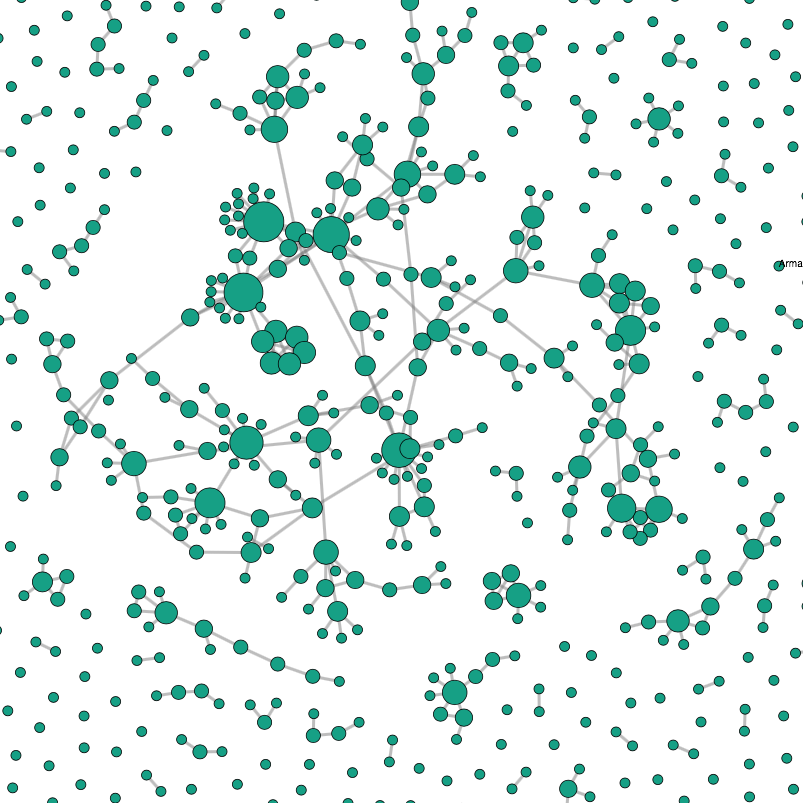